# Analysis

Install connector postgres: pip install psycopg2

## IMPORT LIBRARIES

In [3]:
from connect import connect
import pandas as pd
from config import load_config
## Gestión de imagenes
import cv2
## Gestión de datos
import matplotlib.pyplot as plt
import seaborn as sns

## Config Database

In [4]:
query = 'SELECT * FROM players'

config = load_config()
conn = connect(config)

print(conn)

df = pd.read_sql(query, con=conn)
conn.close()

df.head()

Connected to the PostgreSQL server.
<connection object at 0x000001B577B65F10; dsn: 'user=postgres password=xxx dbname=project host=localhost port=5432', closed: 0>


C:\Users\Mario\AppData\Local\Temp\ipykernel_22316\1274760305.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conn)


,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,212,198329,https://sofifa.com/player/198329/rodrigo-moren...,Rodrigo,Rodrigo Moreno Machado,23,1991-03-06,180,70,Spain,...,57+0,58+0,58+0,58+0,57+0,53+0,50+0,50+0,50+0,53+0
1,213,199556,https://sofifa.com/player/199556/marco-verratt...,M. Verratti,Marco Verratti,21,1992-11-05,165,60,Italy,...,78+0,80+0,80+0,80+0,78+0,75+0,73+0,73+0,73+0,75+0
2,214,202652,https://sofifa.com/player/202652/raheem-sterli...,R. Sterling,Raheem Sterling,19,1994-12-08,170,69,England,...,66+1,61+1,61+1,61+1,66+1,58+1,53+1,53+1,53+1,58+1
3,215,204525,https://sofifa.com/player/204525/inigo-martine...,Iñigo Martínez,Íñigo Martínez Berridi,23,1991-05-17,181,77,Spain,...,70+0,74+0,74+0,74+0,70+0,75+0,80+0,80+0,80+0,75+0
4,216,205525,https://sofifa.com/player/205525/bernard-anici...,Bernard,Bernard Anício Caldeira Duarte,21,1992-09-08,164,57,Brazil,...,62+0,58+0,58+0,58+0,62+0,54+0,43+0,43+0,43+0,54+0


# Initialize Data Analysis

In [5]:
df.shape

(100995, 105)

Al inicializar el análisis nos damos cuenta que coincide el valor de datos del dataframe con el de la tabla en postgresql

In [6]:
# Revisar tipos de datos y datos faltantes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100995 entries, 0 to 100994
Data columns (total 105 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    id                          int64  
 1    sofifa_id                   int64  
 2    player_url                  object 
 3    short_name                  object 
 4    long_name                   object 
 5    age                         int64  
 6    dob                         object 
 7    height_cm                   int64  
 8    weight_kg                   int64  
 9    nationality                 object 
 10   club                        object 
 11   overall                     int64  
 12   potential                   int64  
 13   value_eur                   int64  
 14   wage_eur                    int64  
 15   player_positions            object 
 16   preferred_foot              object 
 17   international_reputation    object 
 18   weak_foot                   int64  
 19   

Hay sobre todo valores de tipo object y de tipo int en este dataframe, aunque los últimos valores alternan entre enteros y rango de enteros, pero para poder importarlo en un principio se tomó como string.

In [7]:
df.isnull().sum()

id            0
sofifa_id     0
player_url    0
short_name    0
long_name     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 105, dtype: int64

No está tomando los nulos, o postgresql no los regresa como nulos, al ser un varchar me imagino que los tomas como campos string sin contenido, por que los enteros parece que no hay nulos.

In [8]:
df['overall'].head()
df[df['overall'] > 93]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15299,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
30205,30347,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
47174,47356,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
64735,64948,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
64736,64949,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
82548,82718,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


El rango de overall termina en el 94

In [9]:
df['potential'].head()
df[df['potential'] > 94]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15299,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
30207,30349,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
64777,64989,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,19,1998-12-20,178,73,France,...,65+3,62+3,62+3,62+3,65+3,62+3,53+3,53+3,53+3,62+3
82558,82728,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,...,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3
100781,1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3


El rango de overall termina en el 95

In [10]:
df.duplicated().sum()

np.int64(0)

No hay valores duplicados, ya que por lo menos la edad del jugador cambia entre un año y otro.

In [11]:
df['short_name'].head()
df[df['short_name'] == "L. Messi"]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15299,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
30206,30348,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
47175,47357,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
64736,64949,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
82548,82718,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
100781,1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3


Logramos visualizar que existen hasta 6 registros de cada jugador

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100995.0,5.049800e+04,2.915489e+04,1.0,25249.5,50498.0,75746.5,100995.0
sofifa_id,100995.0,2.054170e+05,3.504586e+04,2.0,190674.0,212230.0,228983.5,252905.0
age,100995.0,2.507212e+01,4.634504e+00,16.0,21.0,25.0,28.0,47.0
height_cm,100995.0,1.811978e+02,6.697101e+00,154.0,176.0,181.0,186.0,205.0
weight_kg,100995.0,7.535336e+01,6.975713e+00,49.0,70.0,75.0,80.0,110.0
overall,100995.0,6.581431e+01,7.104778e+00,40.0,61.0,66.0,70.0,94.0
potential,100995.0,7.072325e+01,6.321098e+00,40.0,66.0,70.0,75.0,95.0
value_eur,100995.0,1.890161e+06,4.820973e+06,0.0,140000.0,525000.0,1300000.0,123000000.0
wage_eur,100995.0,9.116689e+03,2.089729e+04,0.0,1000.0,2000.0,8000.0,565000.0
weak_foot,100995.0,2.941868e+00,6.587290e-01,1.0,3.0,3.0,3.0,5.0


## Un analisis exploratorio

### Potential Distribution

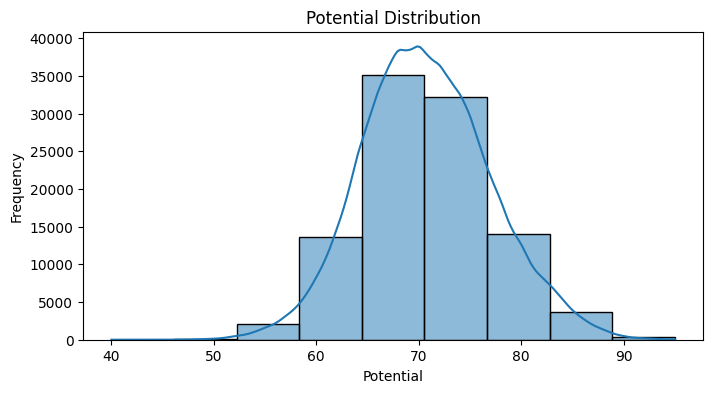

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df["potential"], kde=True, bins=9)
plt.title("Potential Distribution")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

### Age Distribution

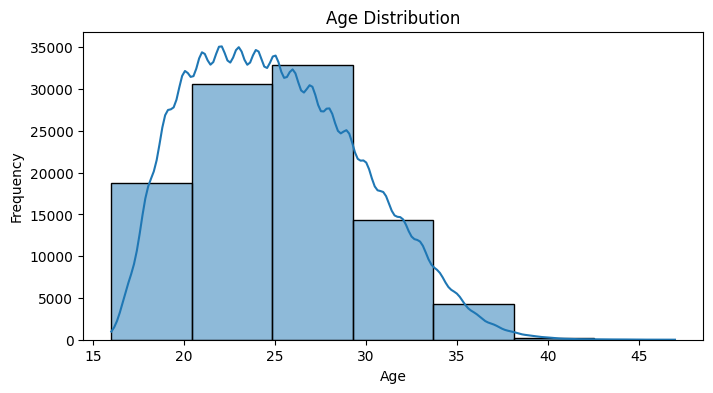

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df["age"], kde=True, bins=7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Height Distribution

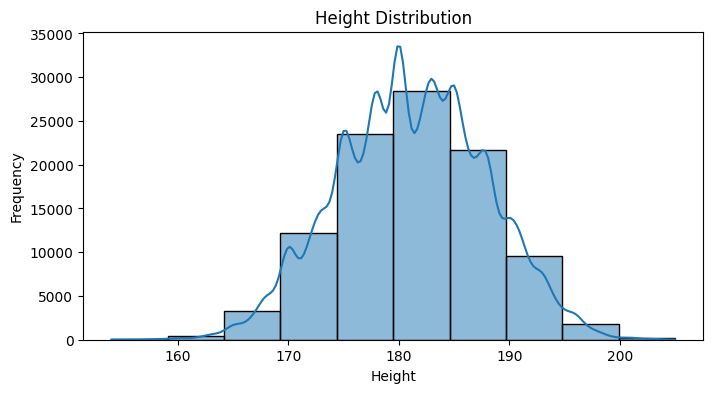

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(df["height_cm"], kde=True, bins=10)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

### Potential Distribution

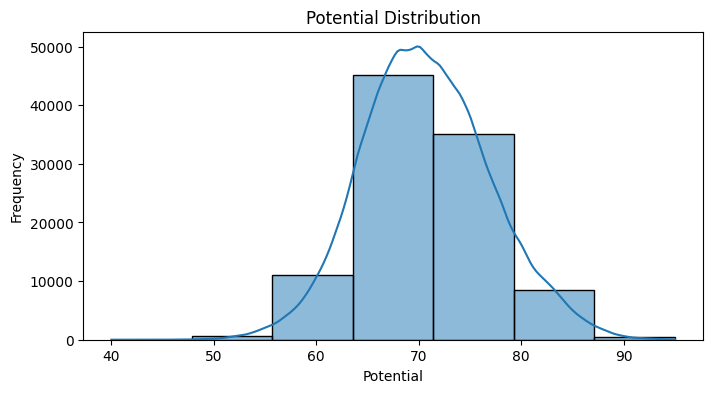

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df["potential"], kde=True, bins=7)
plt.title("Potential Distribution")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

### Player Value Distribution

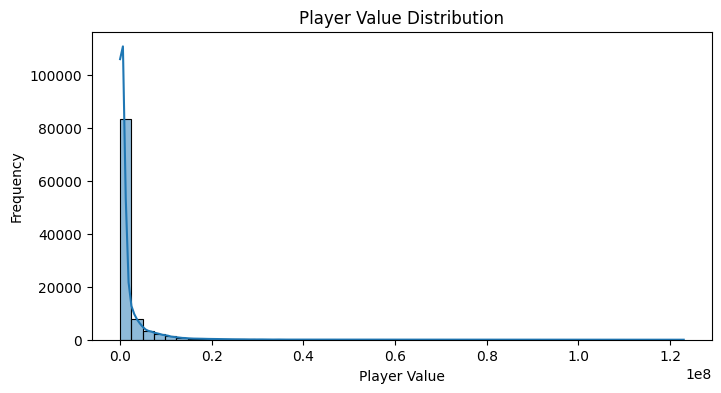

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df["value_eur"], kde=True, bins=50)
plt.title("Player Value Distribution")
plt.xlabel("Player Value")
plt.ylabel("Frequency")
plt.show()

C:\Users\Mario\AppData\Local\Temp\ipykernel_22316\278616764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nationality', data=df[df['nationality'].isin(['Argentina','Portugal', 'Germany', 'Brazil', 'France'])], palette='coolwarm')


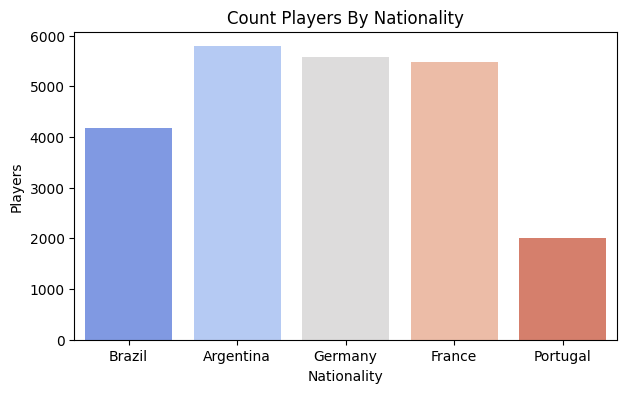

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(x='nationality', data=df[df['nationality'].isin(['Argentina','Portugal', 'Germany', 'Brazil', 'France'])], palette='coolwarm')
plt.title("Count Players By Nationality")
plt.xlabel("Nationality")
plt.ylabel("Players")
plt.show()

# Data Cleaning

In [64]:
print("Null Data")
print(df["joined"].isnull().sum())
print("\nDuplicated Data")
print(df.duplicated().sum())

Null Data
8038

Duplicated Data
0


In [79]:
df[df["gk_diving"].isnull()]["gk_diving"]

Series([], Name: gk_diving, dtype: float64)

In [74]:
df['gk_diving'] = df['gk_diving'].fillna(0)
df[df["gk_diving"].isnull()]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [80]:
df['nation_jersey_number'] = df['nation_jersey_number'].fillna(0)
df['pace'] = df['pace'].fillna(0)
df['shooting'] = df['shooting'].fillna(0)
df['passing'] = df['passing'].fillna(0)
df['dribbling'] = df['dribbling'].fillna(0)
df['defending'] = df['defending'].fillna(0)
df['physic'] = df['physic'].fillna(0)
df['gk_diving'] = df['gk_diving'].fillna(0)
df['gk_handling'] = df['gk_handling'].fillna(0)
df['gk_kicking'] = df['gk_kicking'].fillna(0)
df['gk_kicking'] = df['gk_kicking'].fillna(0)
df['gk_reflexes'] = df['gk_reflexes'].fillna(0)
df['gk_speed'] = df['gk_speed'].fillna(0)
df['gk_positioning'] = df['gk_positioning'].fillna(0)

Se verifica que todos los datos nulos que sean enteros que son parte de la estadistica de los jugadores se llene con 0.

In [83]:
print(df[df["dob"].isnull()]["dob"])
print(df[df["joined"].isnull()]["joined"])

Series([], Name: dob, dtype: object)
0         None
63        None
71        None
77        None
111       None
          ... 
100927    None
100933    None
100956    None
100958    None
100967    None
Name: joined, Length: 8038, dtype: object


In [85]:
df = df.drop('joined', axis=1)

KeyError: "['joined'] not found in axis"

Se elimina la columna joined ya que tiene muchos nulos, el eliminar toda esta data sería más contraproducente que eliminar la columna que no da mucha información importante, solo el año de ingreso de un jugador a su actual equipo, pero esto no aporta valor a los resultados que se quieren obtener

# Data Wrangling

In [30]:
def getRangeMean(data):
  minusRange = data.split("-")
  addRange = data.split("+")
  if(len(minusRange) > 1) :
    return ((2*int(minusRange[0])) - int(minusRange[1]))/2
  elif(len(addRange) > 1) :
    return ((2*int(addRange[0])) + int(addRange[1]))/2
  elif(data=="") :
    return 0
  else:
    return int(data)

Se genera una función para hacer una media de las caracteristicas según posición y reflejos, ya que hay datos como 10+5, esto se asume a que se refiere a que esta entre 10 y 15, por lo que sirve más la media que sería 12.5

In [ ]:
dfClean = df
dfClean['lb'] = dfClean['lb'].apply(getRangeMean)
dfClean['lb']

0         53.0
1         75.0
2         58.5
3         75.0
4         54.0
          ... 
100990    50.0
100991    52.5
100992    66.0
100993    77.0
100994    51.5
Name: lb, Length: 100995, dtype: float64

Se comprueba con lb que está funcionando la transformación, por lo cuál se procede a todos los demás.

In [31]:
dfClean['attacking_crossing'] = dfClean['attacking_crossing'].apply(getRangeMean)
dfClean['attacking_finishing'] = dfClean['attacking_finishing'].apply(getRangeMean)
dfClean['attacking_heading_accuracy'] = dfClean['attacking_heading_accuracy'].apply(getRangeMean)
dfClean['attacking_short_passing'] = dfClean['attacking_short_passing'].apply(getRangeMean)
dfClean['attacking_volleys'] = dfClean['attacking_volleys'].apply(getRangeMean)
dfClean['skill_dribbling'] = dfClean['skill_dribbling'].apply(getRangeMean)
dfClean['skill_curve'] = dfClean['skill_curve'].apply(getRangeMean)
dfClean['skill_fk_accuracy'] = dfClean['skill_fk_accuracy'].apply(getRangeMean)
dfClean['skill_long_passing'] = dfClean['skill_long_passing'].apply(getRangeMean)
dfClean['skill_ball_control'] = dfClean['skill_ball_control'].apply(getRangeMean)
dfClean['movement_acceleration'] = dfClean['movement_acceleration'].apply(getRangeMean)
dfClean['movement_sprint_speed'] = dfClean['movement_sprint_speed'].apply(getRangeMean)
dfClean['movement_agility'] = dfClean['movement_agility'].apply(getRangeMean)
dfClean['movement_reactions'] = dfClean['movement_reactions'].apply(getRangeMean)
dfClean['movement_balance'] = dfClean['movement_balance'].apply(getRangeMean)
dfClean['power_shot_power'] = dfClean['power_shot_power'].apply(getRangeMean)
dfClean['power_jumping'] = dfClean['power_jumping'].apply(getRangeMean)
dfClean['power_stamina'] = dfClean['power_stamina'].apply(getRangeMean)
dfClean['power_strength'] = dfClean['power_strength'].apply(getRangeMean)
dfClean['power_long_shots'] = dfClean['power_long_shots'].apply(getRangeMean)
dfClean['mentality_aggression'] = dfClean['mentality_aggression'].apply(getRangeMean)
dfClean['mentality_interceptions'] = dfClean['mentality_interceptions'].apply(getRangeMean)
dfClean['mentality_positioning'] = dfClean['mentality_positioning'].apply(getRangeMean)
dfClean['mentality_vision'] = dfClean['mentality_vision'].apply(getRangeMean)
dfClean['mentality_penalties'] = dfClean['mentality_penalties'].apply(getRangeMean)
dfClean['mentality_composure'] = dfClean['mentality_composure'].apply(getRangeMean)
dfClean['defending_marking'] = dfClean['defending_marking'].apply(getRangeMean)
dfClean['defending_standing_tackle'] = dfClean['defending_standing_tackle'].apply(getRangeMean)
dfClean['defending_sliding_tackle'] = dfClean['defending_sliding_tackle'].apply(getRangeMean)
dfClean['goalkeeping_diving'] = dfClean['goalkeeping_diving'].apply(getRangeMean)
dfClean['goalkeeping_handling'] = dfClean['goalkeeping_handling'].apply(getRangeMean)
dfClean['goalkeeping_kicking'] = dfClean['goalkeeping_kicking'].apply(getRangeMean)
dfClean['goalkeeping_positioning'] = dfClean['goalkeeping_positioning'].apply(getRangeMean)
dfClean['goalkeeping_reflexes'] = dfClean['goalkeeping_reflexes'].apply(getRangeMean)
dfClean['ls'] = dfClean['ls'].apply(getRangeMean)
dfClean['st'] = dfClean['st'].apply(getRangeMean)
dfClean['rs'] = dfClean['rs'].apply(getRangeMean)
dfClean['lw'] = dfClean['lw'].apply(getRangeMean)
dfClean['lf'] = dfClean['lf'].apply(getRangeMean)
dfClean['cf'] = dfClean['cf'].apply(getRangeMean)
dfClean['rf'] = dfClean['rf'].apply(getRangeMean)
dfClean['rw'] = dfClean['rw'].apply(getRangeMean)
dfClean['lam'] = dfClean['lam'].apply(getRangeMean)
dfClean['cam'] = dfClean['cam'].apply(getRangeMean)
dfClean['ram'] = dfClean['ram'].apply(getRangeMean)
dfClean['lm'] = dfClean['lm'].apply(getRangeMean)
dfClean['lcm'] = dfClean['lcm'].apply(getRangeMean)
dfClean['cm'] = dfClean['cm'].apply(getRangeMean)
dfClean['rcm'] = dfClean['rcm'].apply(getRangeMean)
dfClean['rm'] = dfClean['rm'].apply(getRangeMean)
dfClean['lwb'] = dfClean['lwb'].apply(getRangeMean)
dfClean['ldm'] = dfClean['ldm'].apply(getRangeMean)
dfClean['cdm'] = dfClean['cdm'].apply(getRangeMean)
dfClean['rdm'] = dfClean['rdm'].apply(getRangeMean)
dfClean['rwb'] = dfClean['rwb'].apply(getRangeMean)
dfClean['lcb'] = dfClean['lcb'].apply(getRangeMean)
dfClean['cb'] = dfClean['cb'].apply(getRangeMean)
dfClean['rcb'] = dfClean['rcb'].apply(getRangeMean)
dfClean['rb'] = dfClean['rb'].apply(getRangeMean)

In [69]:
df[df["rcb"].isnull()]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
